In [4]:
path += 'data'

In [5]:
import os

In [6]:
try:
    os.mkdir(path+'/data2/')
except:
    pass

In [7]:
import pandas as pd

In [8]:
os.listdir(path+'/')

['ak.csv',
 'ct.csv',
 'wy.csv',
 'in.csv',
 'la.csv',
 'id.csv',
 'sd.csv',
 'me.csv',
 'ga.csv',
 'co.csv',
 'mn.csv',
 'sc.csv',
 'al.csv',
 'data2',
 'ne.csv',
 'tn.csv',
 'mi.csv',
 'de.csv',
 'ca.csv',
 'ma.csv',
 'wa.csv',
 'ny.csv',
 'md.csv',
 'mp.csv',
 'va.csv',
 'nh.csv',
 'or.csv',
 'mt.csv',
 'as.csv',
 'hi.csv',
 'pa.csv',
 'wv.csv',
 'ia.csv',
 'pr.csv',
 'ky.csv',
 'ri.csv',
 'dc.csv',
 'gu.csv',
 'vi.csv',
 'az.csv',
 'nj.csv',
 'tx.csv',
 'wi.csv',
 'nm.csv',
 'vt.csv',
 'fl.csv',
 'ar.csv',
 'ks.csv',
 'ms.csv',
 'mo.csv',
 'nv.csv',
 'ut.csv',
 'nd.csv',
 'ok.csv',
 'oh.csv',
 'il.csv',
 'nc.csv']

In [10]:
fns = os.listdir(path+'/')
for fn in fns[:1]:
    df = pd.read_csv(path+'/'+fn)

In [11]:
df.head()

,Unnamed: 0,time_value,full_time_work_prop,stderr_full_time_work_prop,sample_size_full_time_work_prop,part_time_work_prop,stderr_part_time_work_prop,sample_size_part_time_work_prop,smoothed_search,stderr_smoothed_search,...,sample_size_covid_ag_smoothed_pct_positive,smoothed_adj_covid19,stderr_smoothed_adj_covid19,sample_size_smoothed_adj_covid19,confirmed_7dav_incidence_num,stderr_confirmed_7dav_incidence_num,sample_size_confirmed_7dav_incidence_num,deaths_7dav_incidence_num,stderr_deaths_7dav_incidence_num,sample_size_deaths_7dav_incidence_num
0,0,2020-02-02,0.029233,0.001105,524,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020-02-03,0.044904,0.001404,523,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020-02-04,0.055521,0.001546,519,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2020-02-05,0.063959,0.001823,515,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2020-02-06,0.071398,0.001992,515,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.describe()

,Unnamed: 0,full_time_work_prop,stderr_full_time_work_prop,sample_size_full_time_work_prop,part_time_work_prop,stderr_part_time_work_prop,sample_size_part_time_work_prop,smoothed_search,stderr_smoothed_search,sample_size_smoothed_search,...,sample_size_covid_ag_smoothed_pct_positive,smoothed_adj_covid19,stderr_smoothed_adj_covid19,sample_size_smoothed_adj_covid19,confirmed_7dav_incidence_num,stderr_confirmed_7dav_incidence_num,sample_size_confirmed_7dav_incidence_num,deaths_7dav_incidence_num,stderr_deaths_7dav_incidence_num,sample_size_deaths_7dav_incidence_num
count,228.00000,228.000000,228.000000,228.000000,197.000000,197.000000,197.000000,192.000000,0.0,0.0,...,47.000000,17.000000,0.0,0.0,197.000000,0.0,0.0,197.000000,0.0,0.0
mean,113.50000,0.049150,0.001605,519.710526,0.072081,0.002044,519.883249,22.268260,NaN,NaN,...,63.787234,0.789871,NaN,NaN,30.693256,NaN,NaN,0.222625,NaN,NaN
std,65.96211,0.010602,0.000387,2.579908,0.016547,0.000457,2.561802,43.790830,NaN,NaN,...,9.285183,0.500331,NaN,NaN,32.809724,NaN,NaN,0.324384,NaN,NaN
min,0.00000,0.028468,0.000958,512.000000,0.037702,0.001188,512.000000,0.000000,NaN,NaN,...,50.000000,0.286166,NaN,NaN,0.000000,NaN,NaN,-1.428571,NaN,NaN
25%,56.75000,0.040828,0.001343,518.000000,0.058654,0.001702,518.000000,0.000000,NaN,NaN,...,55.500000,0.350930,NaN,NaN,3.285714,NaN,NaN,0.000000,NaN,NaN
50%,113.50000,0.047303,0.001508,520.000000,0.071423,0.001930,520.000000,5.455607,NaN,NaN,...,63.000000,0.622417,NaN,NaN,12.857143,NaN,NaN,0.142857,NaN,NaN
75%,170.25000,0.056373,0.001761,521.000000,0.083608,0.002341,522.000000,23.240006,NaN,NaN,...,69.000000,1.280749,NaN,NaN,65.285714,NaN,NaN,0.428571,NaN,NaN
max,227.00000,0.080580,0.003032,526.000000,0.115661,0.003368,526.000000,349.487418,NaN,NaN,...,83.000000,1.869983,NaN,NaN,113.857143,NaN,NaN,1.428571,NaN,NaN


In [12]:
df.smoothed_hh_cmnty_cli.describe()

count    151.000000
mean      18.117937
std        3.286625
min       11.935666
25%       15.672090
50%       19.283122
75%       20.669509
max       23.694985
Name: smoothed_hh_cmnty_cli, dtype: float64

In [15]:
column = 'smoothed_hh_cmnty_cli'

In [28]:
df.columns

Index(['Unnamed: 0', 'time_value', 'full_time_work_prop',
       'stderr_full_time_work_prop', 'sample_size_full_time_work_prop',
       'part_time_work_prop', 'stderr_part_time_work_prop',
       'sample_size_part_time_work_prop', 'smoothed_search',
       'stderr_smoothed_search', 'sample_size_smoothed_search',
       'smoothed_adj_cli', 'stderr_smoothed_adj_cli',
       'sample_size_smoothed_adj_cli', 'smoothed_cli', 'stderr_smoothed_cli',
       'sample_size_smoothed_cli', 'smoothed_hh_cmnty_cli',
       'stderr_smoothed_hh_cmnty_cli', 'sample_size_smoothed_hh_cmnty_cli',
       'nmf_day_doc_fbc_fbs_ght', 'stderr_nmf_day_doc_fbc_fbs_ght',
       'sample_size_nmf_day_doc_fbc_fbs_ght', 'covid_ag_smoothed_pct_positive',
       'stderr_covid_ag_smoothed_pct_positive',
       'sample_size_covid_ag_smoothed_pct_positive', 'smoothed_adj_covid19',
       'stderr_smoothed_adj_covid19', 'sample_size_smoothed_adj_covid19',
       'confirmed_7dav_incidence_num', 'stderr_confirmed_7dav_incidenc

In [29]:
type(df.time_value.iloc[0])

str

In [30]:
from datetime import datetime

In [32]:
df['date'] = [datetime.strptime(d, "%Y-%m-%d") for d in df.time_value.values]

In [44]:
df.notna()

,Unnamed: 0,time_value,full_time_work_prop,stderr_full_time_work_prop,sample_size_full_time_work_prop,part_time_work_prop,stderr_part_time_work_prop,sample_size_part_time_work_prop,smoothed_search,stderr_smoothed_search,...,smoothed_adj_covid19,stderr_smoothed_adj_covid19,sample_size_smoothed_adj_covid19,confirmed_7dav_incidence_num,stderr_confirmed_7dav_incidence_num,sample_size_confirmed_7dav_incidence_num,deaths_7dav_incidence_num,stderr_deaths_7dav_incidence_num,sample_size_deaths_7dav_incidence_num,date
0,True,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,True,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,True,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,True,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,True,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,True,True,True,True,True,True,True,True,True,False,...,False,False,False,True,False,False,True,False,False,True
224,True,True,True,True,True,True,True,True,True,False,...,False,False,False,True,False,False,True,False,False,True
225,True,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
226,True,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [35]:
df[column].notna()

0      False
1      False
2      False
3      False
4      False
       ...  
223     True
224     True
225    False
226    False
227    False
Name: smoothed_hh_cmnty_cli, Length: 228, dtype: bool

In [37]:
df[column].notna().values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [36]:
import numpy as np

In [40]:
np.where(df[column].notna().values==True)[0][0]

74

In [42]:
first_time = np.where(df[column].notna().values==True)[0][0]
df['time_value'].iloc[first_time:]

74     2020-04-16
75     2020-04-17
76     2020-04-18
77     2020-04-19
78     2020-04-20
          ...    
223    2020-09-12
224    2020-09-13
225    2020-09-14
226    2020-09-15
227    2020-09-16
Name: time_value, Length: 154, dtype: object

In [26]:
224-74

150

In [52]:
newDF = df.loc[df['date']>df['date'][first_time]]

In [53]:
newDF

,Unnamed: 0,time_value,full_time_work_prop,stderr_full_time_work_prop,sample_size_full_time_work_prop,part_time_work_prop,stderr_part_time_work_prop,sample_size_part_time_work_prop,smoothed_search,stderr_smoothed_search,...,smoothed_adj_covid19,stderr_smoothed_adj_covid19,sample_size_smoothed_adj_covid19,confirmed_7dav_incidence_num,stderr_confirmed_7dav_incidence_num,sample_size_confirmed_7dav_incidence_num,deaths_7dav_incidence_num,stderr_deaths_7dav_incidence_num,sample_size_deaths_7dav_incidence_num,date
75,75,2020-04-17,0.065135,0.002356,516,0.086675,0.002833,516.0,9.729554,NaN,...,NaN,NaN,NaN,9.000000,NaN,NaN,0.285714,NaN,NaN,2020-04-17
76,76,2020-04-18,0.050243,0.001887,519,0.062356,0.002284,519.0,6.162295,NaN,...,NaN,NaN,NaN,8.142857,NaN,NaN,0.142857,NaN,NaN,2020-04-18
77,77,2020-04-19,0.032384,0.001069,519,0.037702,0.001188,519.0,3.057583,NaN,...,NaN,NaN,NaN,6.714286,NaN,NaN,0.142857,NaN,NaN,2020-04-19
78,78,2020-04-20,0.047054,0.001357,519,0.066588,0.001914,519.0,0.518751,NaN,...,NaN,NaN,NaN,6.285714,NaN,NaN,0.142857,NaN,NaN,2020-04-20
79,79,2020-04-21,0.040285,0.001274,522,0.055897,0.001640,522.0,0.000000,NaN,...,NaN,NaN,NaN,6.285714,NaN,NaN,0.000000,NaN,NaN,2020-04-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,223,2020-09-12,0.039658,0.001342,519,0.059458,0.001634,519.0,0.000000,NaN,...,NaN,NaN,NaN,76.714286,NaN,NaN,0.285714,NaN,NaN,2020-09-12
224,224,2020-09-13,0.041428,0.001646,520,0.061386,0.002065,520.0,0.000000,NaN,...,NaN,NaN,NaN,73.285714,NaN,NaN,0.285714,NaN,NaN,2020-09-13
225,225,2020-09-14,0.071717,0.002554,515,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-14
226,226,2020-09-15,0.058863,0.001645,518,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-15


In [54]:
newDF[column].describe()

count    150.000000
mean      18.086226
std        3.274377
min       11.935666
25%       15.671347
50%       19.168714
75%       20.663241
max       23.694985
Name: smoothed_hh_cmnty_cli, dtype: float64

In [55]:
last_time = np.where(df[column].notna().values==True)[0][-1]

In [56]:
last_time

224

In [59]:
newDF = df.loc[df['date']>df['date'][first_time]].loc[df['date']<df['date'][last_time]]

In [60]:
newDF

,Unnamed: 0,time_value,full_time_work_prop,stderr_full_time_work_prop,sample_size_full_time_work_prop,part_time_work_prop,stderr_part_time_work_prop,sample_size_part_time_work_prop,smoothed_search,stderr_smoothed_search,...,smoothed_adj_covid19,stderr_smoothed_adj_covid19,sample_size_smoothed_adj_covid19,confirmed_7dav_incidence_num,stderr_confirmed_7dav_incidence_num,sample_size_confirmed_7dav_incidence_num,deaths_7dav_incidence_num,stderr_deaths_7dav_incidence_num,sample_size_deaths_7dav_incidence_num,date
75,75,2020-04-17,0.065135,0.002356,516,0.086675,0.002833,516.0,9.729554,NaN,...,NaN,NaN,NaN,9.000000,NaN,NaN,0.285714,NaN,NaN,2020-04-17
76,76,2020-04-18,0.050243,0.001887,519,0.062356,0.002284,519.0,6.162295,NaN,...,NaN,NaN,NaN,8.142857,NaN,NaN,0.142857,NaN,NaN,2020-04-18
77,77,2020-04-19,0.032384,0.001069,519,0.037702,0.001188,519.0,3.057583,NaN,...,NaN,NaN,NaN,6.714286,NaN,NaN,0.142857,NaN,NaN,2020-04-19
78,78,2020-04-20,0.047054,0.001357,519,0.066588,0.001914,519.0,0.518751,NaN,...,NaN,NaN,NaN,6.285714,NaN,NaN,0.142857,NaN,NaN,2020-04-20
79,79,2020-04-21,0.040285,0.001274,522,0.055897,0.001640,522.0,0.000000,NaN,...,NaN,NaN,NaN,6.285714,NaN,NaN,0.000000,NaN,NaN,2020-04-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,219,2020-09-08,0.055100,0.001757,517,0.077823,0.002393,517.0,0.000000,NaN,...,NaN,NaN,NaN,76.714286,NaN,NaN,0.428571,NaN,NaN,2020-09-08
220,220,2020-09-09,0.062337,0.002046,521,0.089220,0.002664,521.0,0.000000,NaN,...,NaN,NaN,NaN,76.000000,NaN,NaN,0.428571,NaN,NaN,2020-09-09
221,221,2020-09-10,0.057051,0.001610,517,0.090418,0.002274,517.0,90.448625,NaN,...,NaN,NaN,NaN,79.142857,NaN,NaN,0.285714,NaN,NaN,2020-09-10
222,222,2020-09-11,0.048739,0.001536,519,0.078939,0.002105,519.0,0.000000,NaN,...,NaN,NaN,NaN,75.285714,NaN,NaN,0.428571,NaN,NaN,2020-09-11


In [61]:
newDF['fbf_mas'] = df.smoothed_hh_cmnty_cli +  df.stderr_smoothed_hh_cmnty_cli
newDF['fbf_men'] = df.smoothed_hh_cmnty_cli -  df.stderr_smoothed_hh_cmnty_cli

In [62]:
newDF

,Unnamed: 0,time_value,full_time_work_prop,stderr_full_time_work_prop,sample_size_full_time_work_prop,part_time_work_prop,stderr_part_time_work_prop,sample_size_part_time_work_prop,smoothed_search,stderr_smoothed_search,...,sample_size_smoothed_adj_covid19,confirmed_7dav_incidence_num,stderr_confirmed_7dav_incidence_num,sample_size_confirmed_7dav_incidence_num,deaths_7dav_incidence_num,stderr_deaths_7dav_incidence_num,sample_size_deaths_7dav_incidence_num,date,fbf_mas,fbf_men
75,75,2020-04-17,0.065135,0.002356,516,0.086675,0.002833,516.0,9.729554,NaN,...,NaN,9.000000,NaN,NaN,0.285714,NaN,NaN,2020-04-17,23.085969,18.767964
76,76,2020-04-18,0.050243,0.001887,519,0.062356,0.002284,519.0,6.162295,NaN,...,NaN,8.142857,NaN,NaN,0.142857,NaN,NaN,2020-04-18,22.190672,18.454489
77,77,2020-04-19,0.032384,0.001069,519,0.037702,0.001188,519.0,3.057583,NaN,...,NaN,6.714286,NaN,NaN,0.142857,NaN,NaN,2020-04-19,21.764067,18.471624
78,78,2020-04-20,0.047054,0.001357,519,0.066588,0.001914,519.0,0.518751,NaN,...,NaN,6.285714,NaN,NaN,0.142857,NaN,NaN,2020-04-20,22.012732,19.009367
79,79,2020-04-21,0.040285,0.001274,522,0.055897,0.001640,522.0,0.000000,NaN,...,NaN,6.285714,NaN,NaN,0.000000,NaN,NaN,2020-04-21,21.680294,18.911422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,219,2020-09-08,0.055100,0.001757,517,0.077823,0.002393,517.0,0.000000,NaN,...,NaN,76.714286,NaN,NaN,0.428571,NaN,NaN,2020-09-08,20.980322,18.092526
220,220,2020-09-09,0.062337,0.002046,521,0.089220,0.002664,521.0,0.000000,NaN,...,NaN,76.000000,NaN,NaN,0.428571,NaN,NaN,2020-09-09,21.340703,18.418333
221,221,2020-09-10,0.057051,0.001610,517,0.090418,0.002274,517.0,90.448625,NaN,...,NaN,79.142857,NaN,NaN,0.285714,NaN,NaN,2020-09-10,21.498677,18.528833
222,222,2020-09-11,0.048739,0.001536,519,0.078939,0.002105,519.0,0.000000,NaN,...,NaN,75.285714,NaN,NaN,0.428571,NaN,NaN,2020-09-11,22.185204,19.198785


In [76]:
for col in newDF.columns:
    if newDF[column].isnull().values.all()==False:
        print(newDF[newDF[column].isnull()])

Empty DataFrame
Columns: [Unnamed: 0, time_value, full_time_work_prop, stderr_full_time_work_prop, sample_size_full_time_work_prop, part_time_work_prop, stderr_part_time_work_prop, sample_size_part_time_work_prop, smoothed_search, stderr_smoothed_search, sample_size_smoothed_search, smoothed_adj_cli, stderr_smoothed_adj_cli, sample_size_smoothed_adj_cli, smoothed_cli, stderr_smoothed_cli, sample_size_smoothed_cli, smoothed_hh_cmnty_cli, stderr_smoothed_hh_cmnty_cli, sample_size_smoothed_hh_cmnty_cli, nmf_day_doc_fbc_fbs_ght, stderr_nmf_day_doc_fbc_fbs_ght, sample_size_nmf_day_doc_fbc_fbs_ght, covid_ag_smoothed_pct_positive, stderr_covid_ag_smoothed_pct_positive, sample_size_covid_ag_smoothed_pct_positive, smoothed_adj_covid19, stderr_smoothed_adj_covid19, sample_size_smoothed_adj_covid19, confirmed_7dav_incidence_num, stderr_confirmed_7dav_incidence_num, sample_size_confirmed_7dav_incidence_num, deaths_7dav_incidence_num, stderr_deaths_7dav_incidence_num, sample_size_deaths_7dav_incide

In [67]:
for column in df.columns:
    print(df[column].isnull().values.all())

False
False
False
False
False
False
False
False
False
True
True
False
True
True
False
False
False
False
False
False
False
False
True
False
False
False
False
True
True
False
True
True
False
True
True
False


In [79]:
newDF.isna().all()

Unnamed: 0                                    False
time_value                                    False
full_time_work_prop                           False
stderr_full_time_work_prop                    False
sample_size_full_time_work_prop               False
part_time_work_prop                           False
stderr_part_time_work_prop                    False
sample_size_part_time_work_prop               False
smoothed_search                               False
stderr_smoothed_search                         True
sample_size_smoothed_search                    True
smoothed_adj_cli                              False
stderr_smoothed_adj_cli                        True
sample_size_smoothed_adj_cli                   True
smoothed_cli                                  False
stderr_smoothed_cli                           False
sample_size_smoothed_cli                      False
smoothed_hh_cmnty_cli                         False
stderr_smoothed_hh_cmnty_cli                  False
sample_size_

In [80]:
newDF.isna().any()

Unnamed: 0                                    False
time_value                                    False
full_time_work_prop                           False
stderr_full_time_work_prop                    False
sample_size_full_time_work_prop               False
part_time_work_prop                           False
stderr_part_time_work_prop                    False
sample_size_part_time_work_prop               False
smoothed_search                                True
stderr_smoothed_search                         True
sample_size_smoothed_search                    True
smoothed_adj_cli                              False
stderr_smoothed_adj_cli                        True
sample_size_smoothed_adj_cli                   True
smoothed_cli                                  False
stderr_smoothed_cli                           False
sample_size_smoothed_cli                      False
smoothed_hh_cmnty_cli                         False
stderr_smoothed_hh_cmnty_cli                  False
sample_size_

In [81]:
newDF.isna().all()==newDF.isna().any()

Unnamed: 0                                     True
time_value                                     True
full_time_work_prop                            True
stderr_full_time_work_prop                     True
sample_size_full_time_work_prop                True
part_time_work_prop                            True
stderr_part_time_work_prop                     True
sample_size_part_time_work_prop                True
smoothed_search                               False
stderr_smoothed_search                         True
sample_size_smoothed_search                    True
smoothed_adj_cli                               True
stderr_smoothed_adj_cli                        True
sample_size_smoothed_adj_cli                   True
smoothed_cli                                   True
stderr_smoothed_cli                            True
sample_size_smoothed_cli                       True
smoothed_hh_cmnty_cli                          True
stderr_smoothed_hh_cmnty_cli                   True
sample_size_

In [83]:
newDF.smoothed_search.isna().sum()

5

In [88]:
newDF.smoothed_search

75      9.729554
76      6.162295
77      3.057583
78      0.518751
79      0.000000
         ...    
219     0.000000
220     0.000000
221    90.448625
222     0.000000
223     0.000000
Name: smoothed_search, Length: 149, dtype: float64

In [89]:
newDF.smoothed_search.describe()

count    144.000000
mean      18.142803
std       39.312748
min        0.000000
25%        0.000000
50%        4.636055
75%       21.719567
max      349.487418
Name: smoothed_search, dtype: float64

In [84]:
newDF.covid_ag_smoothed_pct_positive.isna().sum()

102

In [90]:
newDF.covid_ag_smoothed_pct_positive

75          NaN
76          NaN
77          NaN
78          NaN
79          NaN
         ...   
219    1.515152
220    1.851852
221         NaN
222         NaN
223         NaN
Name: covid_ag_smoothed_pct_positive, Length: 149, dtype: float64

In [98]:
import math
math.isnan(newDF.covid_ag_smoothed_pct_positive.iloc[0])

True

In [85]:
newDF.stderr_covid_ag_smoothed_pct_positive.isna().sum()


102

In [85]:
newDF.stderr_covid_ag_smoothed_pct_positive.isna().sum()


102

In [86]:
newDF.sample_size_covid_ag_smoothed_pct_positive.isna().sum()


102

In [87]:
newDF.smoothed_adj_covid19.isna().sum()

132

In [104]:
(newDFsm.date.iloc[1]-newDFsm.date.iloc[0]).days

1

In [124]:
newDFsm = newDF
newDFsm['days'] = np.array([0])+np.array([(newDFsm.date.iloc[i]-newDFsm.date.iloc[0]).days for i in range(len(newDFsm.date))])
for i,v in enumerate(newDFsm.smoothed_search.values):
    if math.isnan(v):
        newDFsm['smoothed_search'].iloc[i]=np.interp(newDFsm.days.iloc[i], newDFsm.days[newDFsm.smoothed_search.notna()].values, newDFsm.smoothed_search[newDFsm.smoothed_search.notna()].values)


/home/flor/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [125]:
newDFsm.smoothed_search.isna().sum()

0

In [128]:
len(newDFsm.smoothed_search.values)

149

In [129]:
for i,v in enumerate(newDFsm.sample_size_covid_ag_smoothed_pct_positive.values):
    if math.isnan(v):
        newDFsm['sample_size_covid_ag_smoothed_pct_positive'].iloc[i]=np.interp(newDFsm.days.iloc[i], newDFsm.days[newDFsm.sample_size_covid_ag_smoothed_pct_positive.notna()].values, newDFsm.sample_size_covid_ag_smoothed_pct_positive[newDFsm.sample_size_covid_ag_smoothed_pct_positive.notna()].values)


In [130]:
len(newDFsm.sample_size_covid_ag_smoothed_pct_positive.values)

149

In [131]:
newDFsm.sample_size_covid_ag_smoothed_pct_positive

75     56.0
76     56.0
77     56.0
78     56.0
79     56.0
       ... 
219    66.0
220    54.0
221    54.0
222    54.0
223    54.0
Name: sample_size_covid_ag_smoothed_pct_positive, Length: 149, dtype: float64

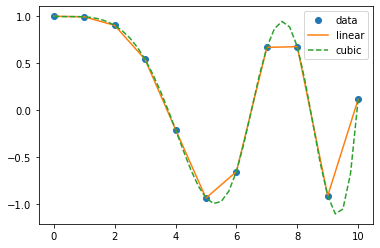

In [133]:
from scipy.interpolate import interp1d



x = np.linspace(0, 10, num=11, endpoint=True)

y = np.cos(-x**2/9.0)

f = interp1d(x, y)

f2 = interp1d(x, y, kind='cubic')



xnew = np.linspace(0, 10, num=41, endpoint=True)

import matplotlib.pyplot as plt

plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')

plt.legend(['data', 'linear', 'cubic'], loc='best')

plt.show()

In [134]:
len(x)

11

In [135]:
len(xnew)

41

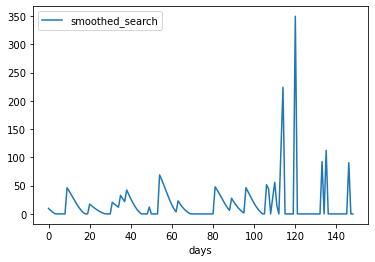

In [136]:
newDFsm.plot(x='days',y='smoothed_search')

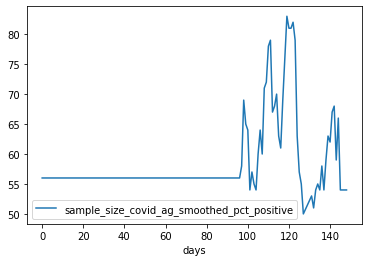

In [137]:
newDFsm.plot(x='days',y='sample_size_covid_ag_smoothed_pct_positive')

In [139]:
x = newDFsm.days[newDFsm.smoothed_search.notna()].values
y = newDFsm.smoothed_search[newDFsm.smoothed_search.notna()].values
xnew = newDFsm.days.values
f2 = interp1d(x, y, kind='cubic')
newDFsm['smoothed_search cubic'] = f2(xnew)
# for i,v in enumerate(newDFsm.smoothed_search.values):
#     if math.isnan(v):
#         newDFsm['smoothed_search cubic'].iloc[i]=np.interp(newDFsm.days.iloc[i], newDFsm.days[newDFsm.smoothed_search.notna()].values, newDFsm.smoothed_search[newDFsm.smoothed_search.notna()].values)


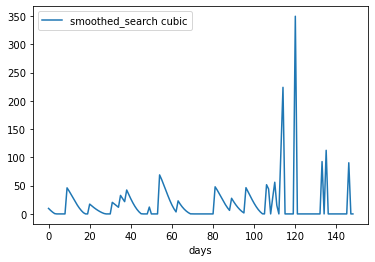

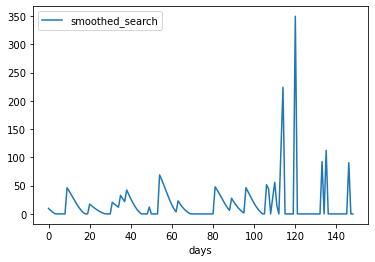

In [141]:
newDFsm.plot(x='days',y='smoothed_search cubic')
newDFsm.plot(x='days',y='smoothed_search')

In [144]:
x = newDFsm.days[newDFsm.sample_size_covid_ag_smoothed_pct_positive.notna()].values
y = newDFsm.sample_size_covid_ag_smoothed_pct_positive[newDFsm.sample_size_covid_ag_smoothed_pct_positive.notna()].values
xnew = newDFsm.days.values
f2 = interp1d(x, y, kind='cubic')
newDFsm['sample_size_covid_ag_smoothed_pct_positive cubic'] = f2(xnew)

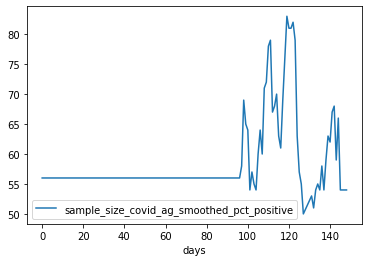

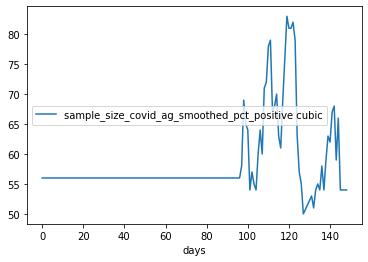

In [145]:
newDFsm.plot(x='days',y='sample_size_covid_ag_smoothed_pct_positive')
newDFsm.plot(x='days',y='sample_size_covid_ag_smoothed_pct_positive cubic')

In [153]:
import csaps
x = newDFsm.days[newDFsm.smoothed_search.notna()].values
y = newDFsm.smoothed_search[newDFsm.smoothed_search.notna()].values

sp = csaps.CubicSmoothingSpline(x, y, smooth=0.3)

xs = newDFsm.days.values
ys = sp(xs)


newDFsm['smoothed_search cs'] = ys



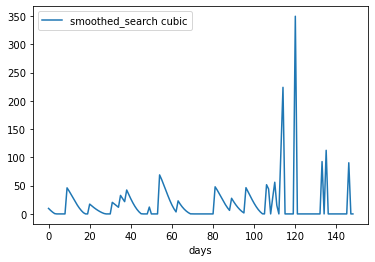

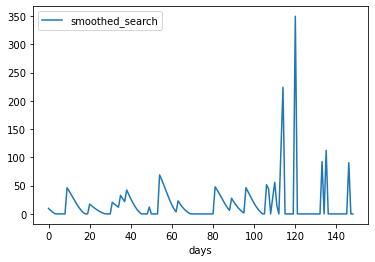

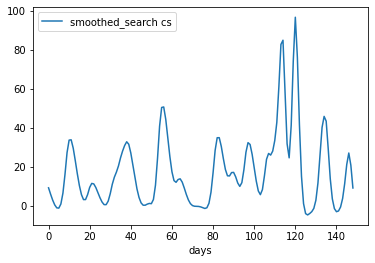

In [154]:
newDFsm.plot(x='days',y='smoothed_search cubic')
newDFsm.plot(x='days',y='smoothed_search')
newDFsm.plot(x='days', y='smoothed_search cs')

In [155]:
newDFsm.columns

Index(['Unnamed: 0', 'time_value', 'full_time_work_prop',
       'stderr_full_time_work_prop', 'sample_size_full_time_work_prop',
       'part_time_work_prop', 'stderr_part_time_work_prop',
       'sample_size_part_time_work_prop', 'smoothed_search',
       'stderr_smoothed_search', 'sample_size_smoothed_search',
       'smoothed_adj_cli', 'stderr_smoothed_adj_cli',
       'sample_size_smoothed_adj_cli', 'smoothed_cli', 'stderr_smoothed_cli',
       'sample_size_smoothed_cli', 'smoothed_hh_cmnty_cli',
       'stderr_smoothed_hh_cmnty_cli', 'sample_size_smoothed_hh_cmnty_cli',
       'nmf_day_doc_fbc_fbs_ght', 'stderr_nmf_day_doc_fbc_fbs_ght',
       'sample_size_nmf_day_doc_fbc_fbs_ght', 'covid_ag_smoothed_pct_positive',
       'stderr_covid_ag_smoothed_pct_positive',
       'sample_size_covid_ag_smoothed_pct_positive', 'smoothed_adj_covid19',
       'stderr_smoothed_adj_covid19', 'sample_size_smoothed_adj_covid19',
       'confirmed_7dav_incidence_num', 'stderr_confirmed_7dav_incidenc

In [156]:
newDFsm.smoothed_hh_cmnty_cli.isna().sum()

0

In [176]:
newDFsmShort = newDFsm[['time_value', 'date', 'days', 'smoothed_hh_cmnty_cli', 'stderr_smoothed_hh_cmnty_cli', 'fbf_mas', 'fbf_men', 'confirmed_7dav_incidence_num', 'deaths_7dav_incidence_num']]

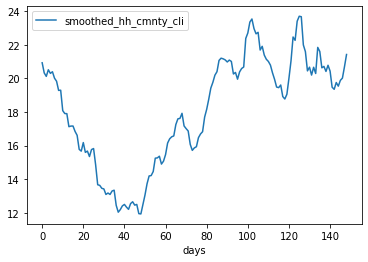

In [177]:
newDFsmShort.plot(x='days',y='smoothed_hh_cmnty_cli')

In [178]:
x = newDFsmShort.days[newDFsmShort.smoothed_hh_cmnty_cli.notna()].values
y = newDFsmShort.smoothed_hh_cmnty_cli[newDFsmShort.smoothed_hh_cmnty_cli.notna()].values

sp = csaps.CubicSmoothingSpline(x, y, smooth=0.85)

xs = newDFsmShort.days.values
ys = sp(xs)


newDFsmShort['smoothed_hh_cmnty_cli cs'] = ys

<ipython-input-178-9126063f0d77>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDFsmShort['smoothed_hh_cmnty_cli cs'] = ys


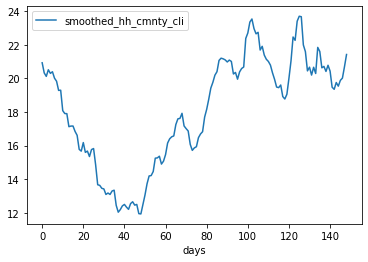

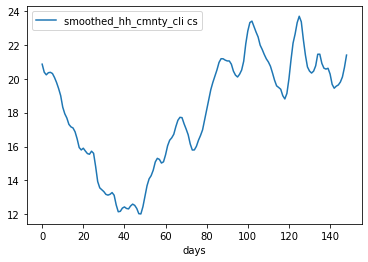

In [179]:
newDFsmShort.plot(x='days',y='smoothed_hh_cmnty_cli')
newDFsmShort.plot(x='days',y='smoothed_hh_cmnty_cli cs')

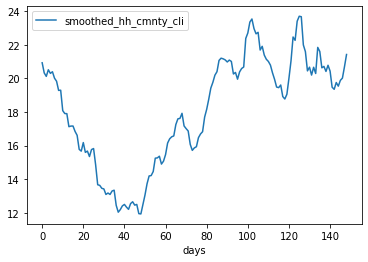

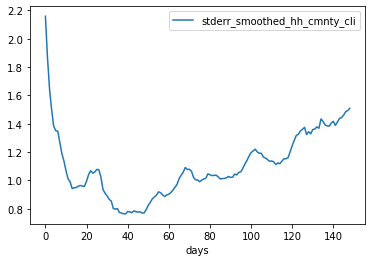

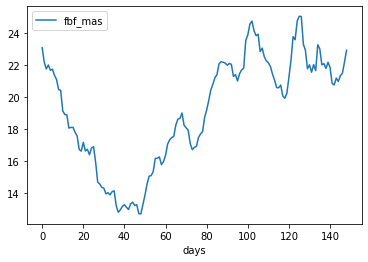

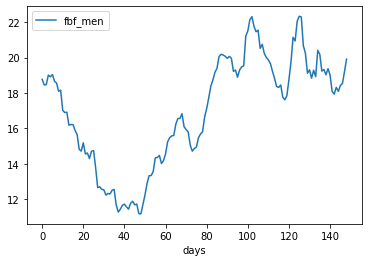

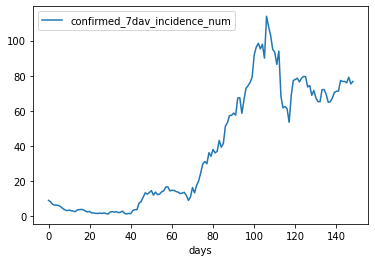

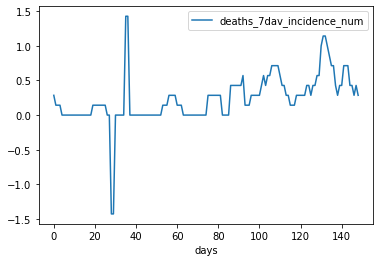

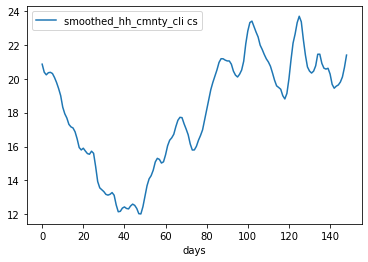

In [180]:
for c in newDFsmShort.columns[3:]:
    newDFsmShort.plot(x='days', y=c)

In [175]:
newDFsmShort.stderr_confirmed_7dav_incidence_num.isna().all()

True

In [189]:
for c in newDFsmShort.columns[3:]:
    x = newDFsmShort.days[newDFsmShort[c].notna()].values
    y = newDFsmShort[c][newDFsmShort[c].notna()].values

    sp = csaps.CubicSmoothingSpline(x, y, smooth=0.85)

    xs = newDFsmShort.days.values
    ys = sp(xs)

    newDFsmShort[c + ' smooth1'] = ys
    
    sp = csaps.CubicSmoothingSpline(x, y, smooth=0.3)
    ys = sp(xs)

    newDFsmShort[c + ' smooth2'] = ys

In [187]:
newDFsmShort

,time_value,date,days,smoothed_hh_cmnty_cli,stderr_smoothed_hh_cmnty_cli,fbf_mas,fbf_men,confirmed_7dav_incidence_num,deaths_7dav_incidence_num,smoothed_hh_cmnty_cli cs,...,confirmed_7dav_incidence_numsmooth2 smooth1,confirmed_7dav_incidence_numsmooth2 smooth2,deaths_7dav_incidence_numsmooth1 smooth1,deaths_7dav_incidence_numsmooth1 smooth2,deaths_7dav_incidence_numsmooth2 smooth1,deaths_7dav_incidence_numsmooth2 smooth2,smoothed_hh_cmnty_cli cssmooth1 smooth1,smoothed_hh_cmnty_cli cssmooth1 smooth2,smoothed_hh_cmnty_cli cssmooth2 smooth1,smoothed_hh_cmnty_cli cssmooth2 smooth2
75,2020-04-17,2020-04-17,0,20.926966,2.159003,23.085969,18.767964,9.000000,0.285714,20.860185,...,8.982015,8.956379,0.263247,0.261350,0.261350,0.259965,20.780911,20.763157,20.763157,20.748164
76,2020-04-18,2020-04-18,1,20.322581,1.868091,22.190672,18.454489,8.142857,0.142857,20.387610,...,7.923175,7.927692,0.187564,0.190414,0.190414,0.192230,20.468392,20.482534,20.482534,20.493844
77,2020-04-19,2020-04-19,2,20.117845,1.646222,21.764067,18.471624,6.714286,0.142857,20.232045,...,7.023641,7.057991,0.137552,0.137330,0.137330,0.137195,20.311116,20.330289,20.330289,20.346812
78,2020-04-20,2020-04-20,3,20.511050,1.501683,22.012732,19.009367,6.285714,0.142857,20.356977,...,6.464074,6.491363,0.092722,0.089929,0.089929,0.088096,20.316314,20.318567,20.318567,20.321943
79,2020-04-21,2020-04-21,4,20.295858,1.384436,21.680294,18.911422,6.285714,0.000000,20.378568,...,6.160530,6.147202,0.038861,0.039775,0.039775,0.040428,20.346769,20.336499,20.336499,20.328595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2020-09-08,2020-09-08,144,19.536424,1.443898,20.980322,18.092526,76.714286,0.428571,19.633349,...,77.022493,77.044046,0.512762,0.519052,0.519052,0.523958,19.600513,19.592891,19.592891,19.588355
220,2020-09-09,2020-09-09,145,19.879518,1.461185,21.340703,18.418333,76.000000,0.428571,19.804047,...,77.141161,77.169705,0.403386,0.412215,0.412215,0.419831,19.806614,19.808289,19.808289,19.810288
221,2020-09-10,2020-09-10,146,20.013755,1.484922,21.498677,18.528833,79.142857,0.285714,20.105399,...,77.119251,77.100862,0.355295,0.357873,0.357873,0.360661,20.160466,20.171722,20.171722,20.180822
222,2020-09-11,2020-09-11,147,20.691995,1.493210,22.185204,19.198785,75.285714,0.428571,20.676248,...,76.750018,76.758360,0.342274,0.337800,0.337800,0.334916,20.694564,20.699500,20.699500,20.703021


/home/flor/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/home/flor/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/home/flor/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface 

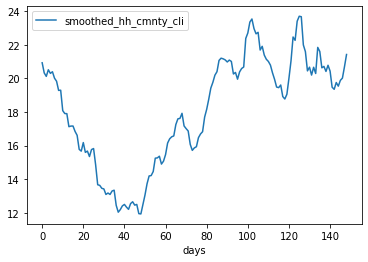

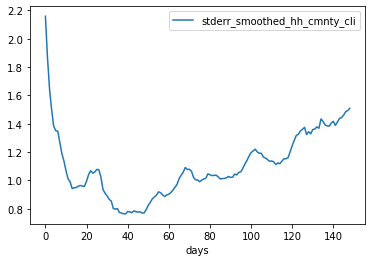

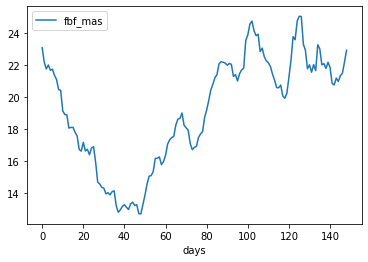

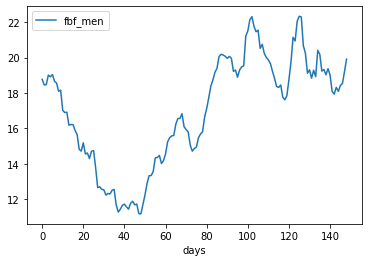

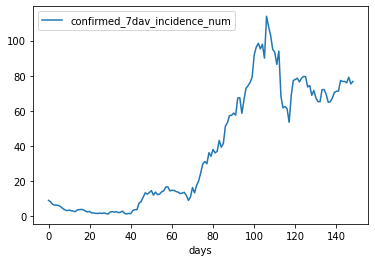

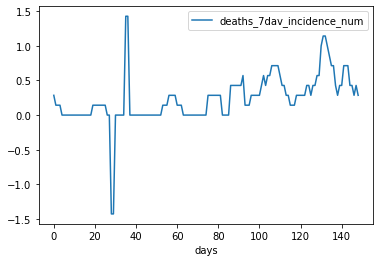

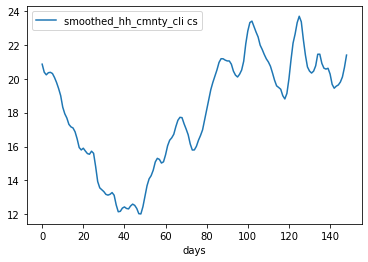

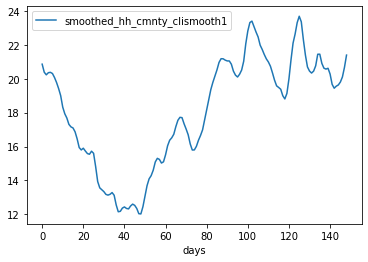

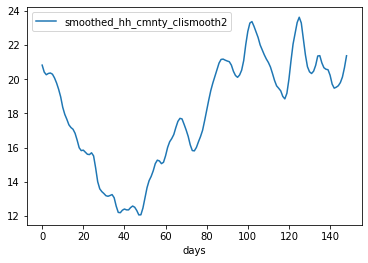

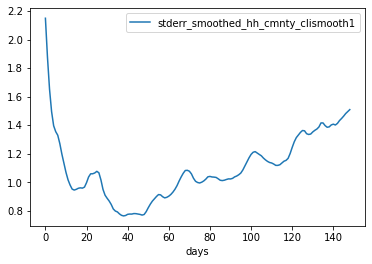

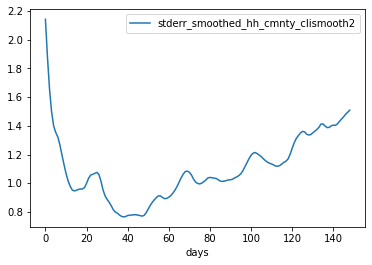

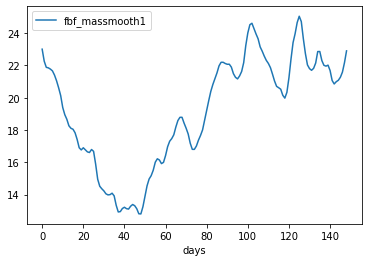

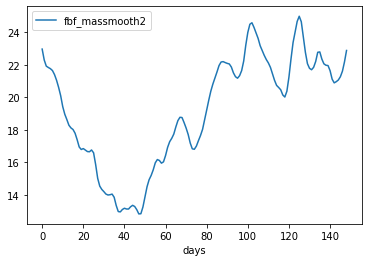

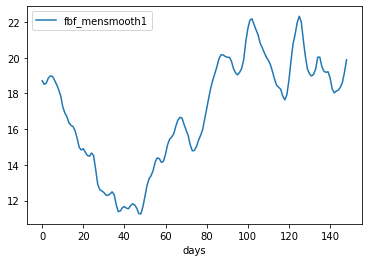

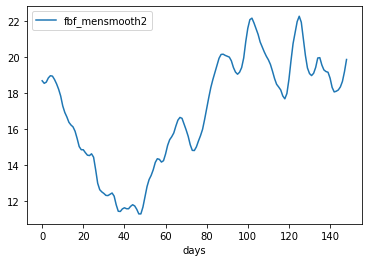

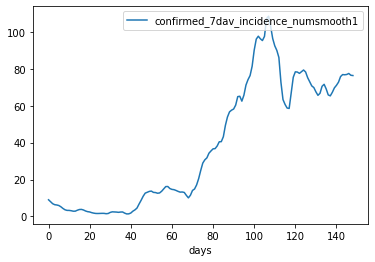

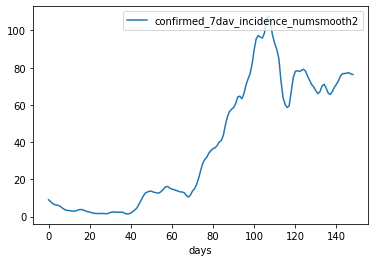

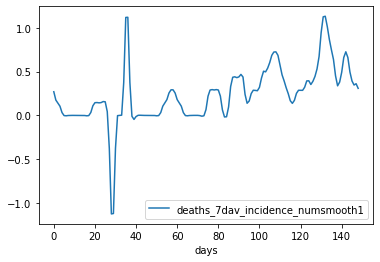

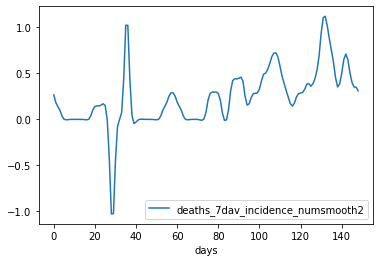

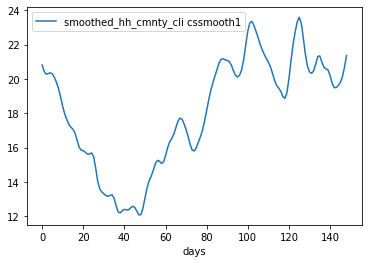

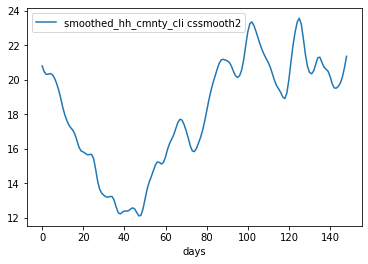

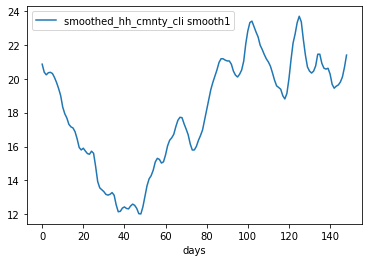

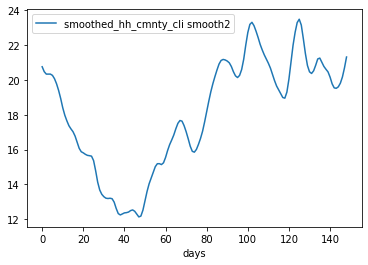

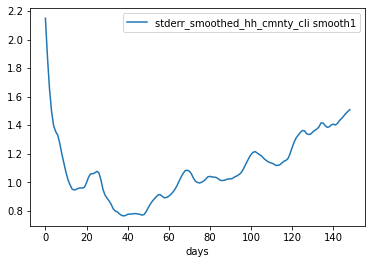

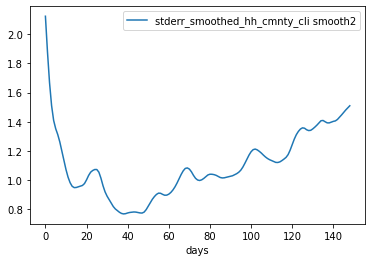

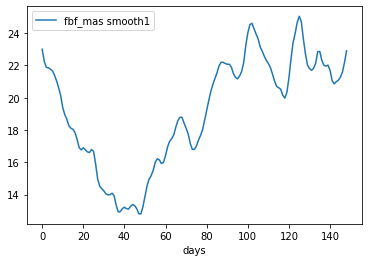

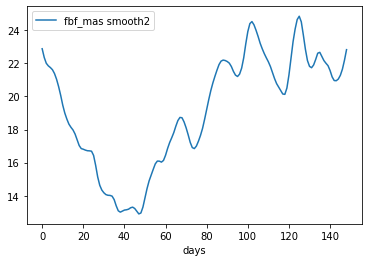

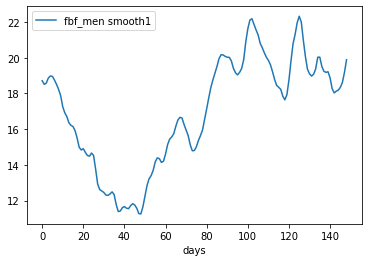

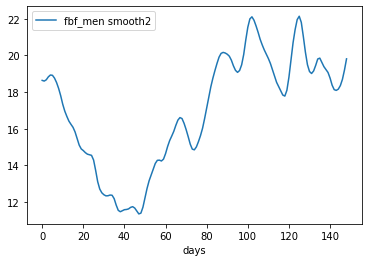

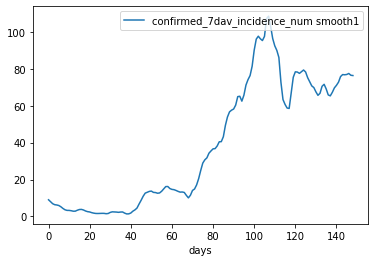

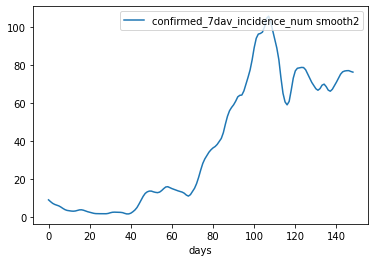

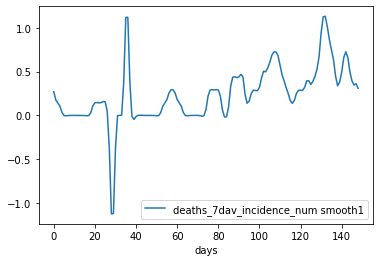

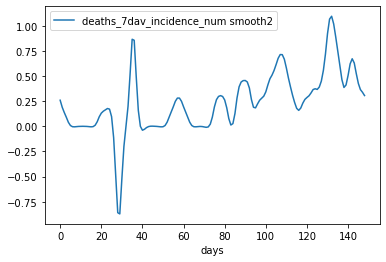

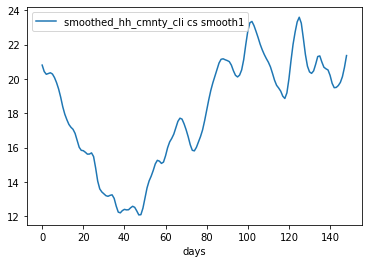

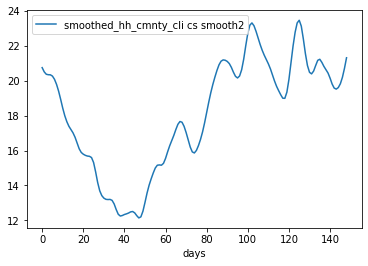

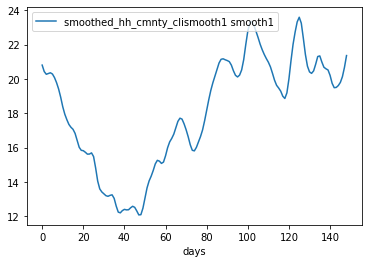

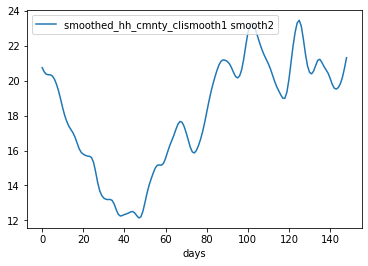

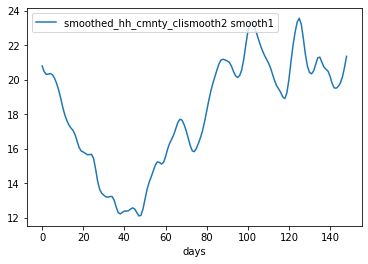

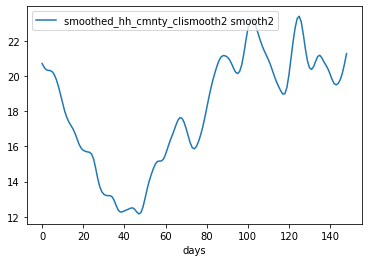

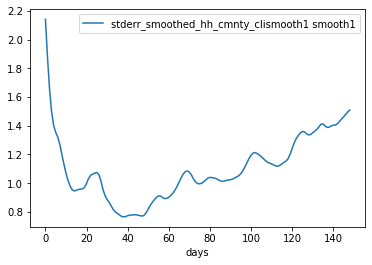

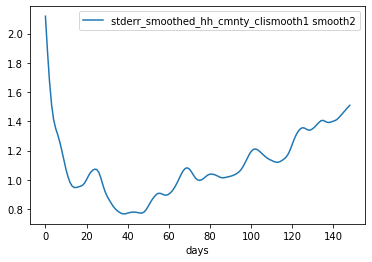

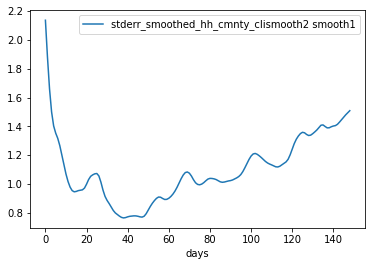

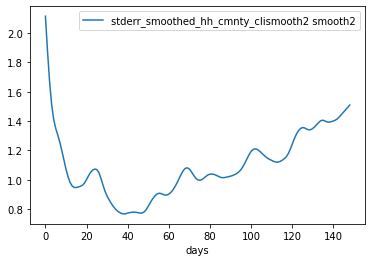

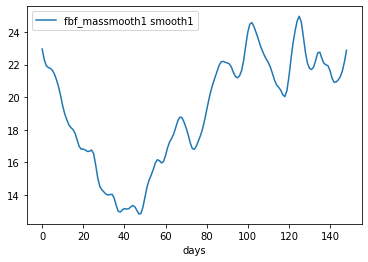

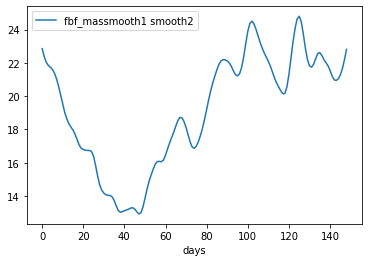

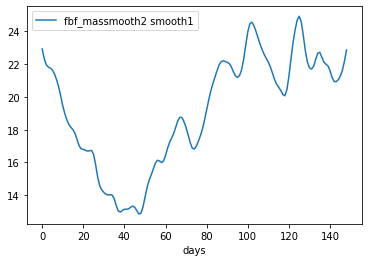

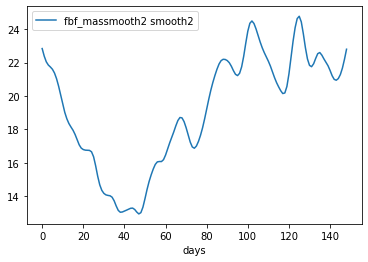

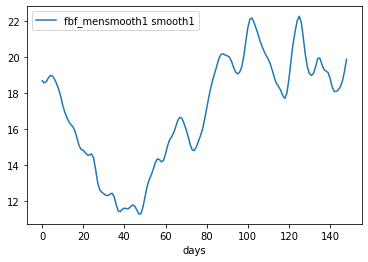

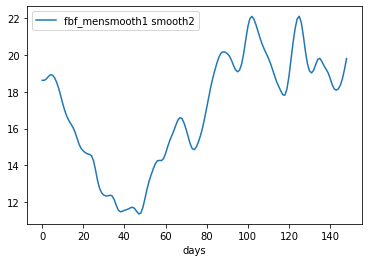

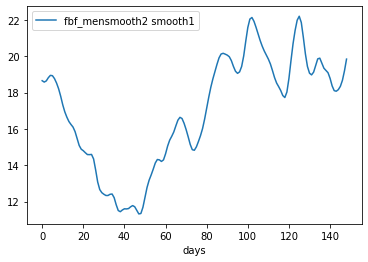

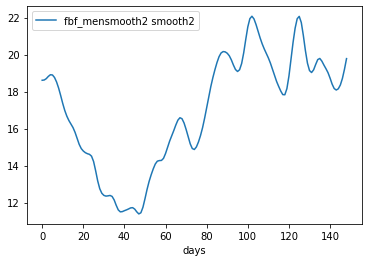

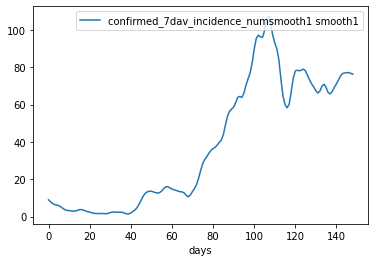

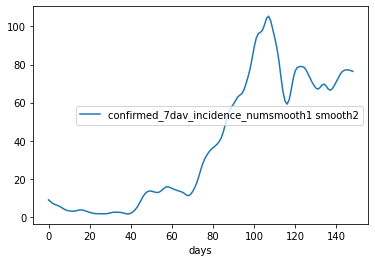

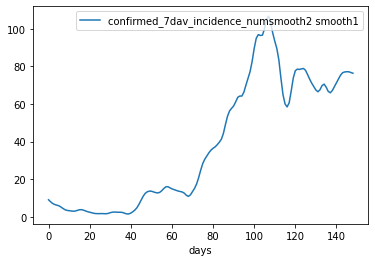

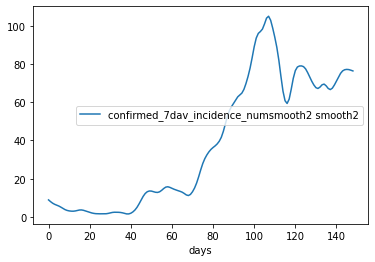

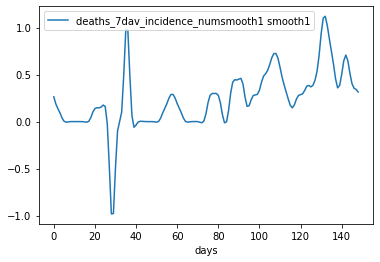

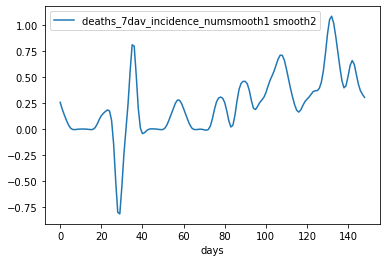

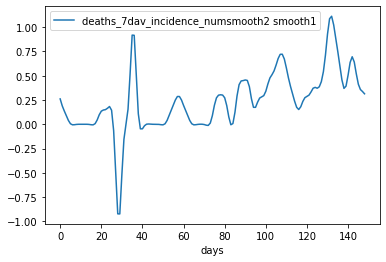

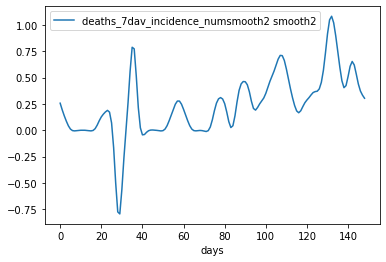

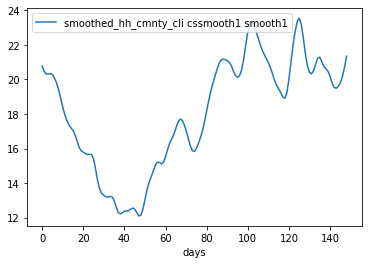

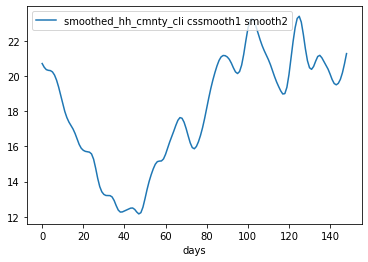

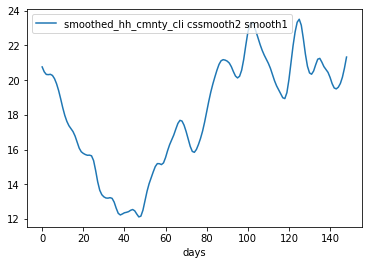

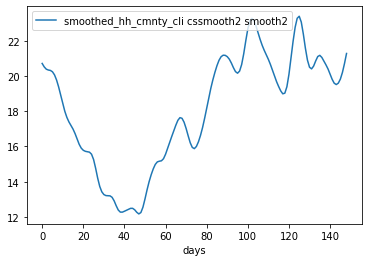

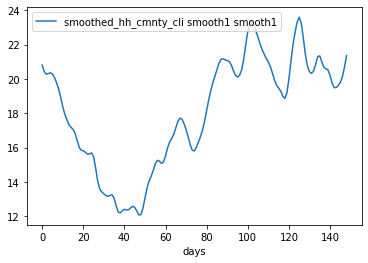

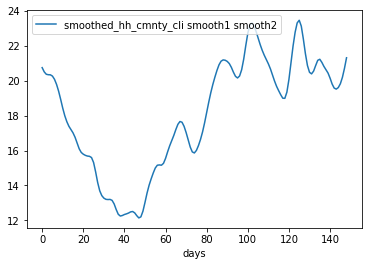

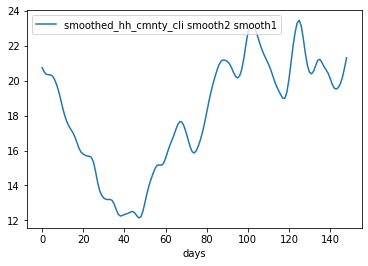

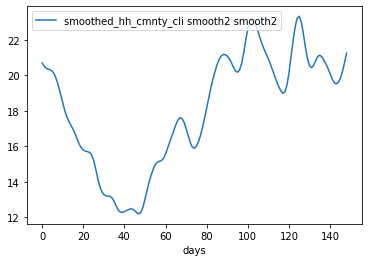

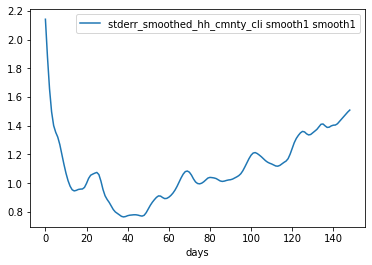

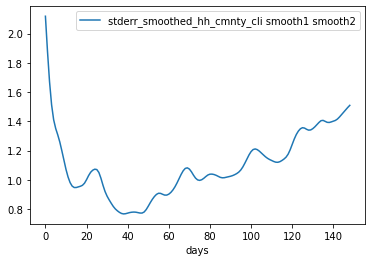

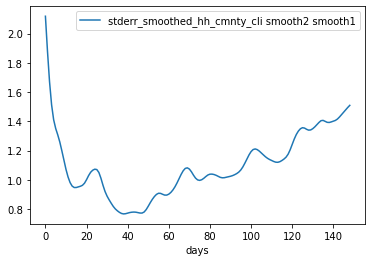

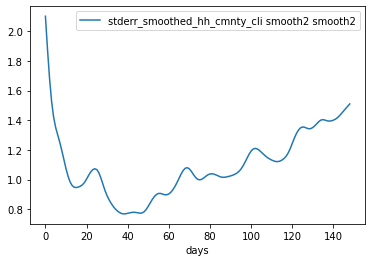

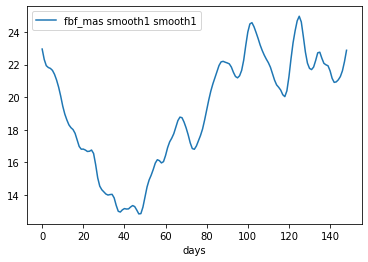

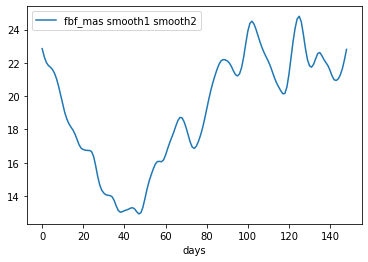

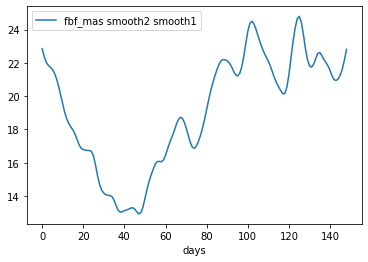

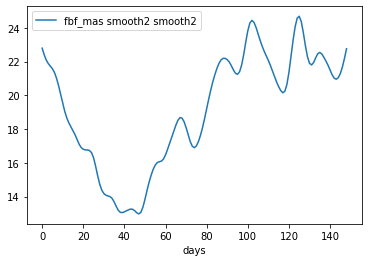

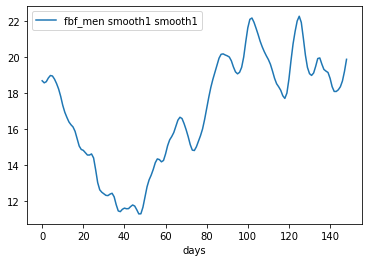

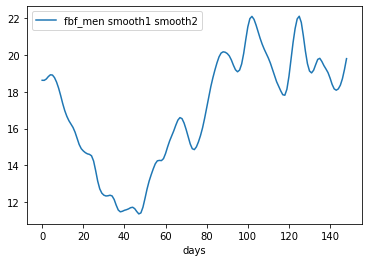

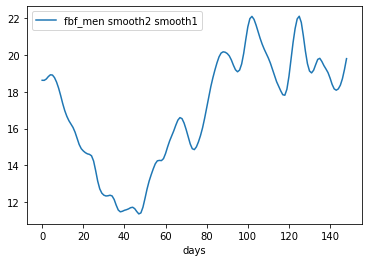

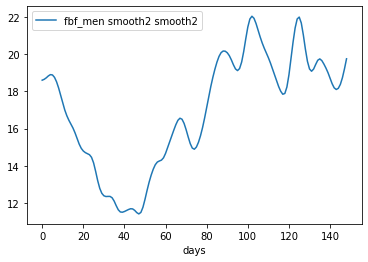

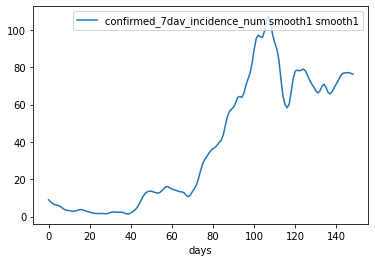

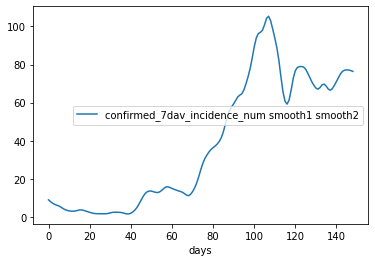

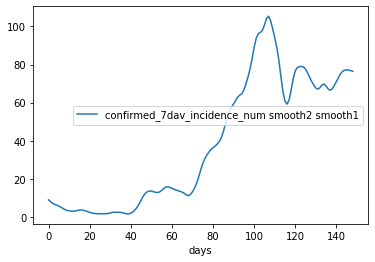

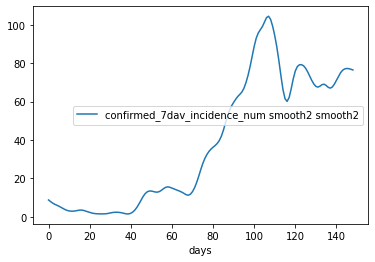

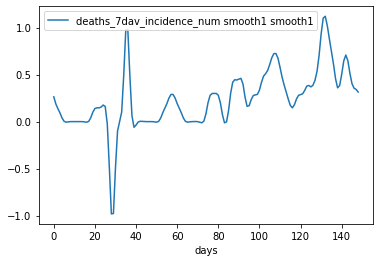

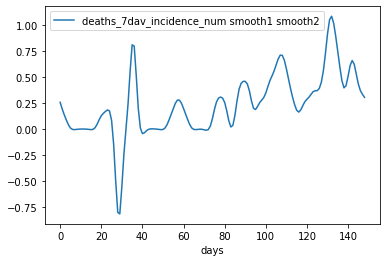

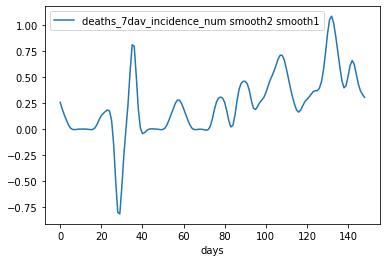

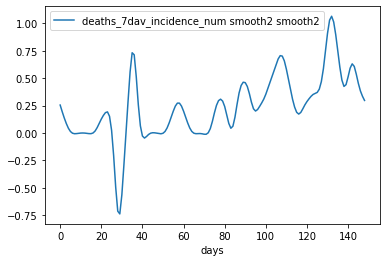

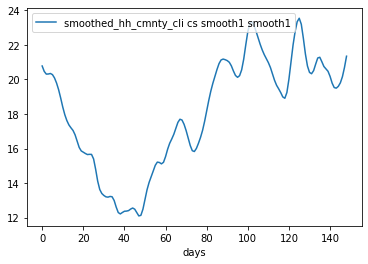

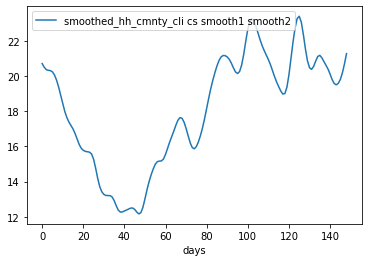

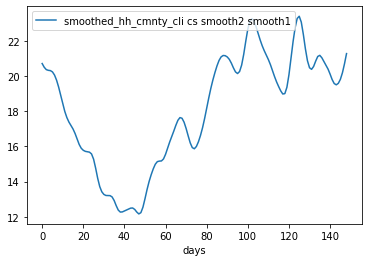

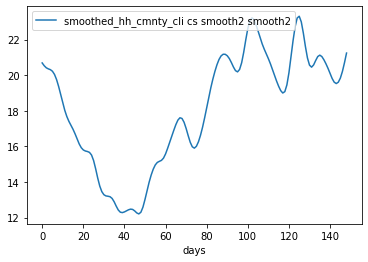

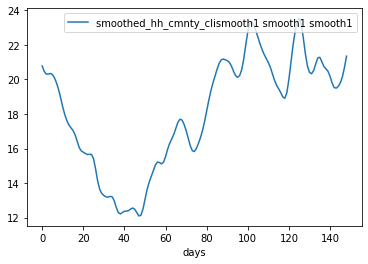

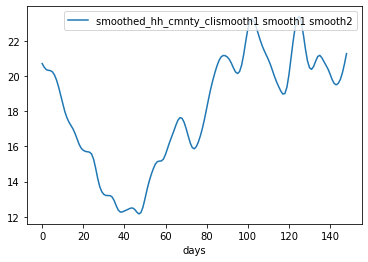

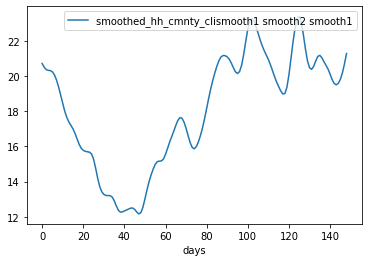

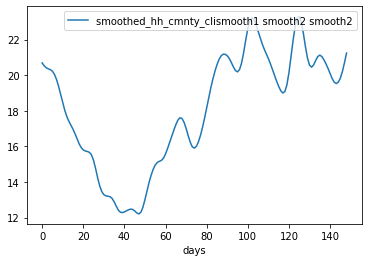

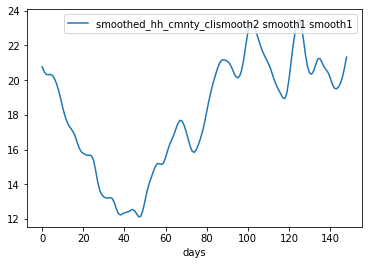

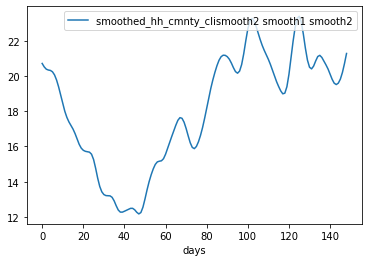

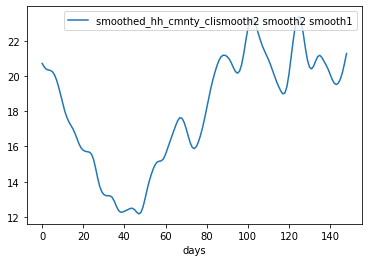

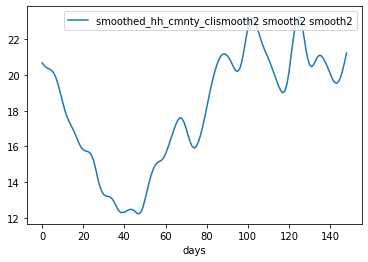

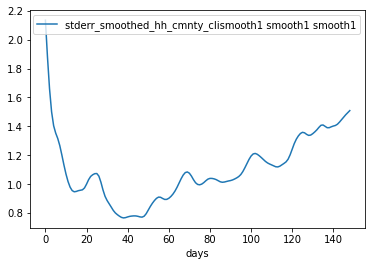

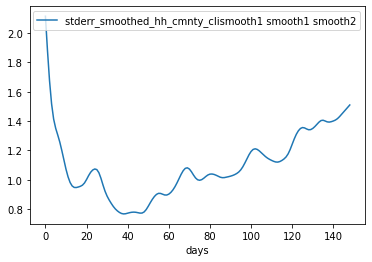

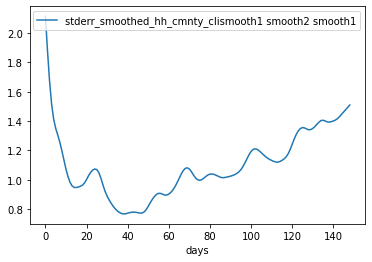

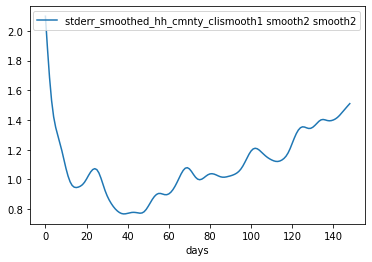

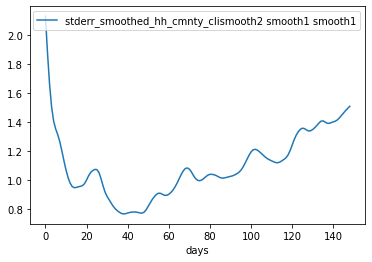

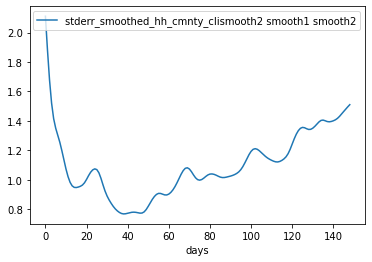

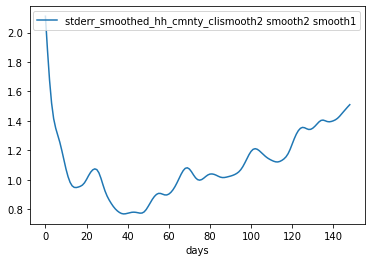

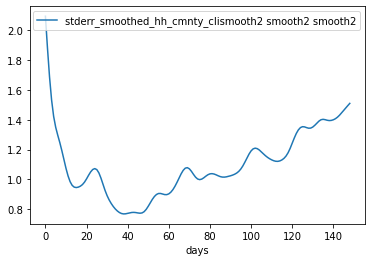

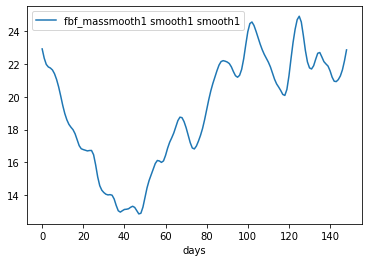

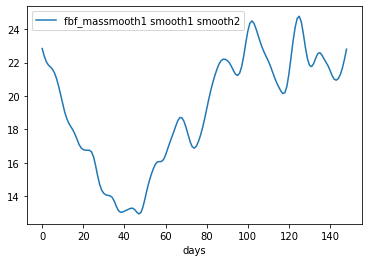

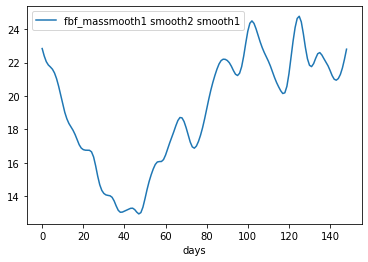

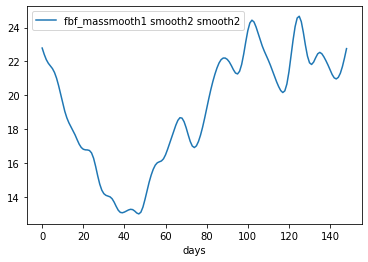

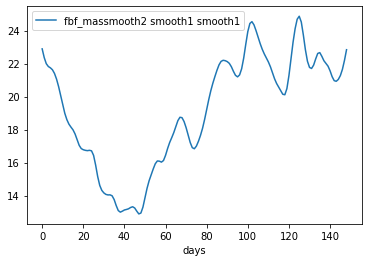

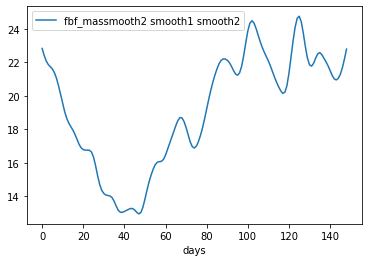

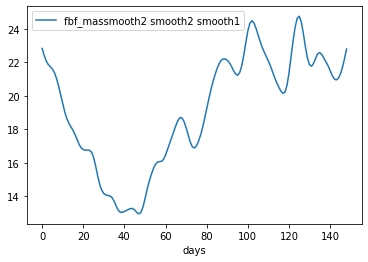

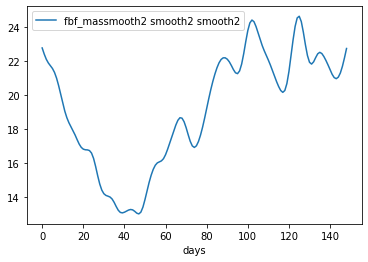

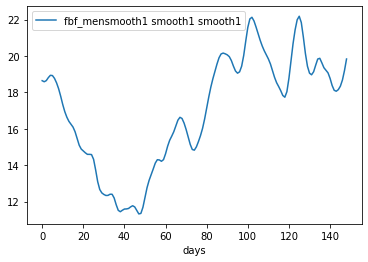

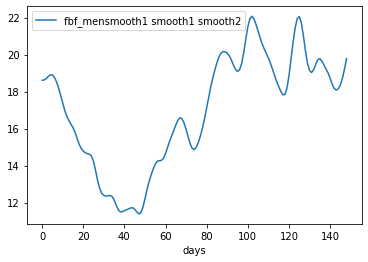

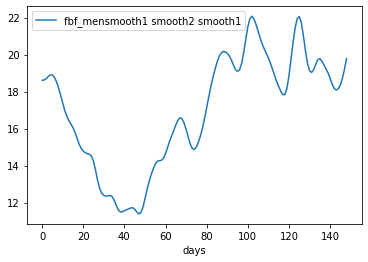

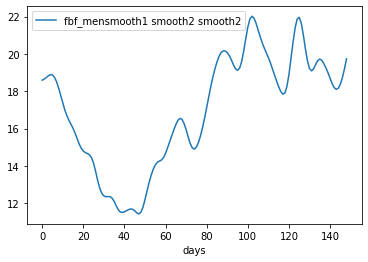

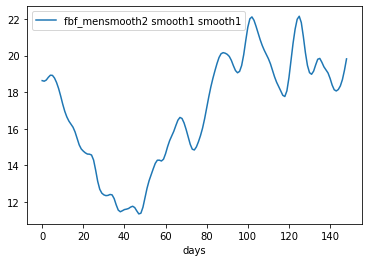

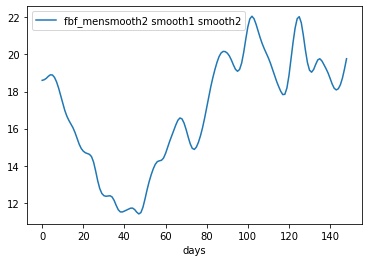

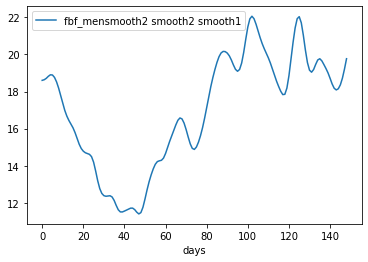

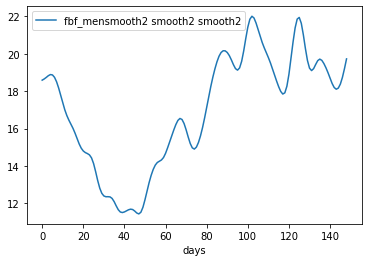

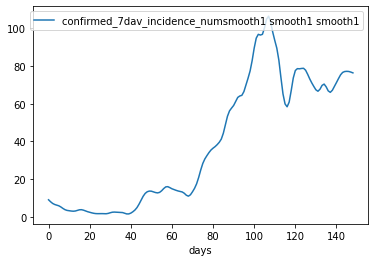

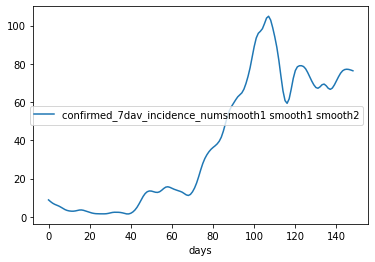

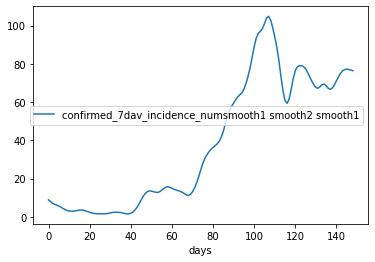

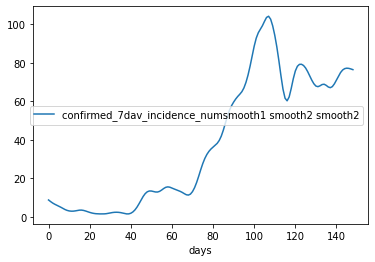

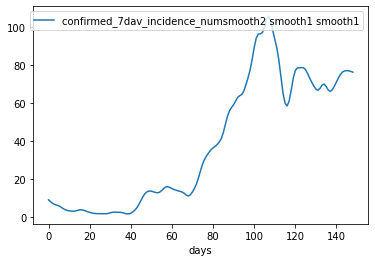

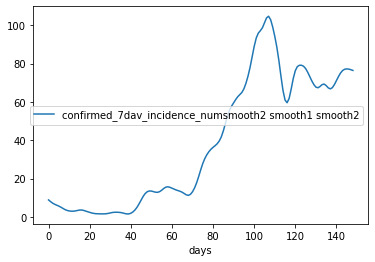

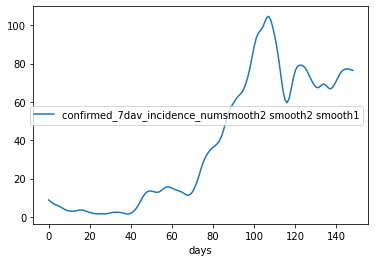

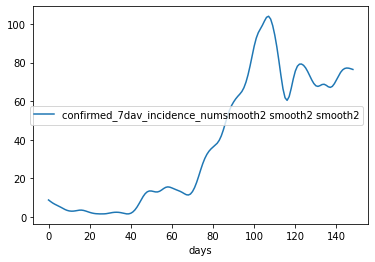

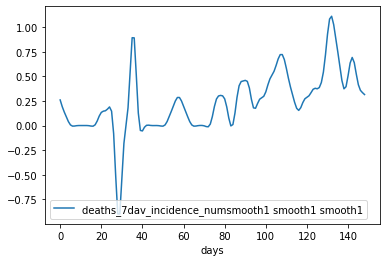

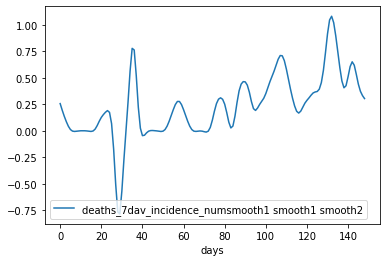

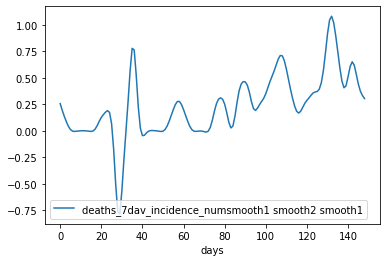

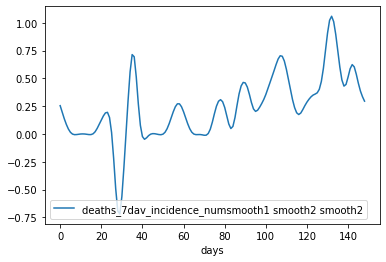

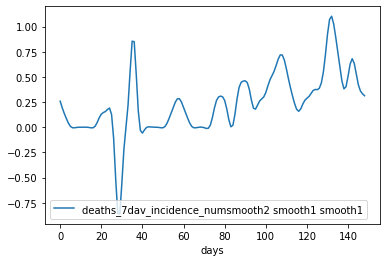

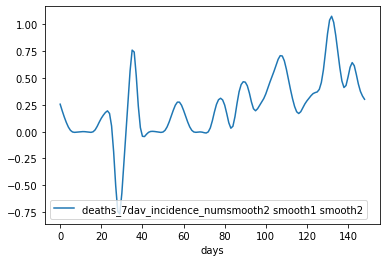

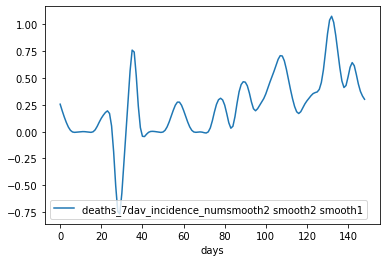

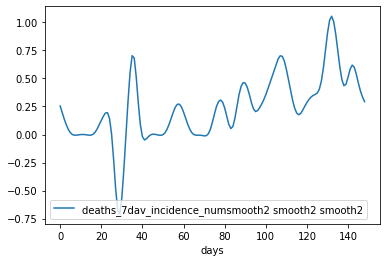

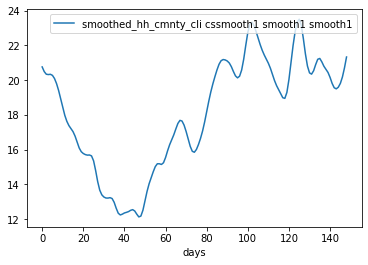

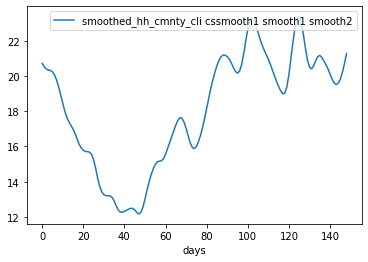

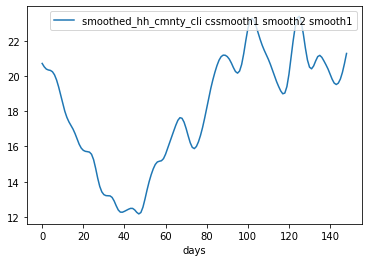

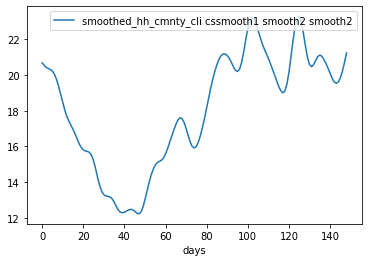

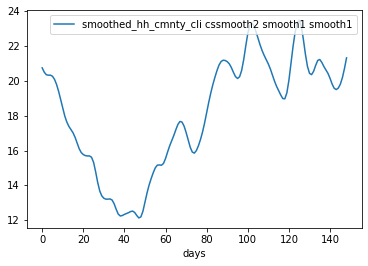

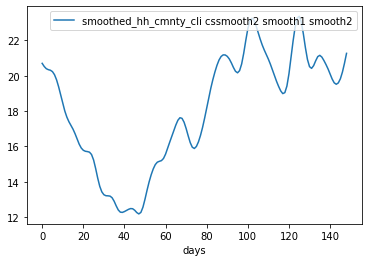

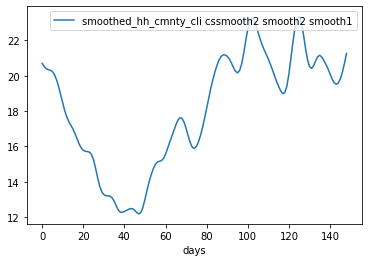

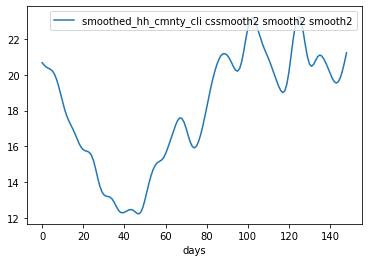

In [190]:
for c in newDFsmShort.columns[3:]:
    newDFsmShort.plot(x='days', y=c)

In [191]:
plt.close()

In [192]:
fn

'ak.csv'